In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d # 3d 그래프

In [2]:
# 데이터 준비

# 공부시간
x1 = [2,4,6,8]

# 과외시간
x2 = [0, 4, 2, 3]

# 성적
y = [81, 93, 91, 97]


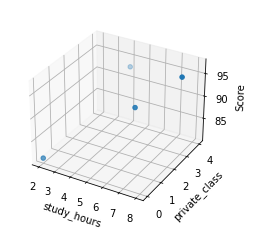

In [3]:
ax = plt.axes(projection = '3d')
ax.set_xlabel('study_hours')
ax.set_ylabel('private_class')
ax.set_zlabel('Score')
ax.dist = 11
ax.scatter(x1,x2,y)
plt.show()

In [4]:
# ndarray 생성
x1_data = np.array(x1)
x2_data = np.array(x2)
y_data  = np.array(y)

In [5]:
# 기울기와 절편
a1 = 0
a2 = 0
b  = 0

In [6]:
# 학습률
lr = 0.02

In [7]:
# 반복횟수
epochs = 2001 

In [8]:
# 경사하강법
for i in range(epochs):
    # 예측 결과 계산
    y_pred = a1 * x1_data + a2 * x2_data + b
    
    # 오차를 계산
    error = y_data - y_pred
    
    # 미분
    a1_diff = -(2/len(x1_data)) * sum(x1_data * error)
    a2_diff = -(2/len(x2_data)) * sum(x2_data * error)
    b_diff = -(2/len(x1_data)) * sum(error)
    
    # 기울기와 절편을 구한다.
    a1 = a1 - lr * a1_diff
    a2 = a2 - lr * a2_diff
    b  = b -lr * b_diff 
    
    if i % 100 ==0:
        print(f'epochs :{i}, 기울기1 : {a1}, 기울기2 :{a2}, 절편 : {b}')

epochs :0, 기울기1 : 18.56, 기울기2 :8.45, 절편 : 3.62
epochs :100, 기울기1 : 7.299356131570395, 기울기2 :4.286665010585169, 절편 : 38.042652982512955
epochs :200, 기울기1 : 4.568311781727336, 기울기2 :3.3451273722751873, 절편 : 56.790141149124004
epochs :300, 기울기1 : 3.123530871282515, 기울기2 :2.8462827383999394, 절편 : 66.7099863300557
epochs :400, 기울기1 : 2.3590568721663314, 기울기2 :2.5823271856465215, 절편 : 71.95886174757398
epochs :500, 기울기1 : 1.9545516974228956, 기울기2 :2.442660701658837, 절편 : 74.7361926881844
epochs :600, 기울기1 : 1.740516375960825, 기울기2 :2.36875914815153, 절편 : 76.20575836457972
epochs :700, 기울기1 : 1.6272641317441279, 기울기2 :2.329655710790506, 절편 : 76.98334782850002
epochs :800, 기울기1 : 1.567339112207579, 기울기2 :2.308964957472434, 절편 : 77.39479277724362
epochs :900, 기울기1 : 1.5356310609341417, 기울기2 :2.2980168848281646, 절편 : 77.61250013273312
epochs :1000, 기울기1 : 1.5188534190854597, 기울기2 :2.2922239447267723, 절편 : 77.72769535576111
epochs :1100, 기울기1 : 1.5099758862602783, 기울기2 :2.2891587335148356, 절편 : 7

In [10]:
# 예측 결과를 추출한다.
y_pred = a1 * x1_data + a2 * x2_data + b
y_pred

array([80.85698503, 92.99995184, 91.42856574, 96.71435609])

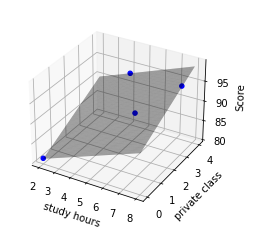

In [11]:
import statsmodels.api as statm
import statsmodels.formula.api as statfa
#from matplotlib.pyplot import figure

data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]

X = [i[0:2] for i in data]
y = [i[2] for i in data]

X_1=statm.add_constant(X)
results=statm.OLS(y,X_1).fit()

hour_class=pd.DataFrame(X,columns=['study_hours','private_class'])
hour_class['Score']=pd.Series(y)

model = statfa.ols(formula='Score ~ study_hours + private_class', data=hour_class)

results_formula = model.fit()

a, b = np.meshgrid(np.linspace(hour_class.study_hours.min(),hour_class.study_hours.max(),100),
                   np.linspace(hour_class.private_class.min(),hour_class.private_class.max(),100))

X_ax = pd.DataFrame({'study_hours': a.ravel(), 'private_class': b.ravel()})
fittedY=results_formula.predict(exog=X_ax)

fig = plt.figure()
graph = fig.add_subplot(111, projection='3d')

graph.scatter(hour_class['study_hours'],hour_class['private_class'],hour_class['Score'],
              c='blue',marker='o', alpha=1)
graph.plot_surface(a,b,fittedY.values.reshape(a.shape),
                   rstride=1, cstride=1, color='none', alpha=0.4)
graph.set_xlabel('study hours')
graph.set_ylabel('private class')
graph.set_zlabel('Score')
graph.dist = 11

plt.show()